In [1]:
from pandas import read_csv, DataFrame
raw_data = read_csv("Dataset_spine.csv")

In [2]:
raw_data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [3]:
# === Rename The Columns === #

column_names = ("pelvic_incidence",
"pelvic_tilt",
"lumbar_lordosis_angle",
"sacral_slope",
"pelvic_radius",
"degree_spondylolisthesis",
"pelvic_slope",
"Direct_tilt",
"thoracic_slope",
"cervical_tilt",
"sacrum_angle",
"scoliosis_slope")

# === Rename === #

rename = {}
for i in range(0,12):
    temp = "Col" + str(i+1)
    rename[temp] = column_names[i]

renamed_data = raw_data.rename(columns = rename)

In [4]:
data = renamed_data.drop("Unnamed: 13",1)
target = "Class_att"
features = [feature for feature in data.columns if feature != target]

In [5]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [6]:
from sklearn.preprocessing import normalize, scale

In [7]:
normed = normalize(data.drop(target,1))

In [9]:
from sklearn.cluster import SpectralBiclustering, SpectralCoclustering

In [10]:
from numpy import argsort
from matplotlib.pyplot import show, imshow, figure, subplot, suptitle, tight_layout, xticks, xlabel

def pipeline(n, input_df):
    
    cocluster = SpectralCoclustering(n_clusters = n)
    cocluster.fit(input_df.values)
    cocluster_fit_data = input_df.values[argsort(cocluster.row_labels_)]
    cocluster_fit_data = cocluster_fit_data[:, argsort(cocluster.column_labels_)]
    
    bicluster = SpectralBiclustering(n_clusters = n)
    bicluster.fit(input_df.values)
    bicluster_fit_data = input_df.values[argsort(bicluster.row_labels_)]
    bicluster_fit_data = bicluster_fit_data[:, argsort(bicluster.column_labels_)]

    figure(figsize=(16,25))
    #suptitle("Mushrooms\n" + "n_clusters = " + str(n),fontsize=32, fontweight='bold')
    
    left_plot = subplot(211)
    ax = imshow(bicluster_fit_data, aspect='auto', cmap="bone")
    #xticks(range(0,len(input_df.columns)), list(input_df.columns[bicluster.column_labels_]),rotation='vertical')
    xlabel("Biclustering")
    
    right_plot = subplot(212)
    ax = imshow(cocluster_fit_data, aspect='auto', cmap="bone")
    #xticks(range(0,len(input_df.columns)), list(input_df.columns[cocluster.column_labels_]),rotation='vertical')
    xlabel("Coclustering")
    
    tight_layout()
    
    show()

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
transformed = DataFrame(normed, columns=features)
#transformed = data.copy()
transformed[target] = LabelEncoder().fit_transform(data[target])
transformed[target] = transformed[target].apply(lambda x: 0.1 if x == 0 else 0.9)

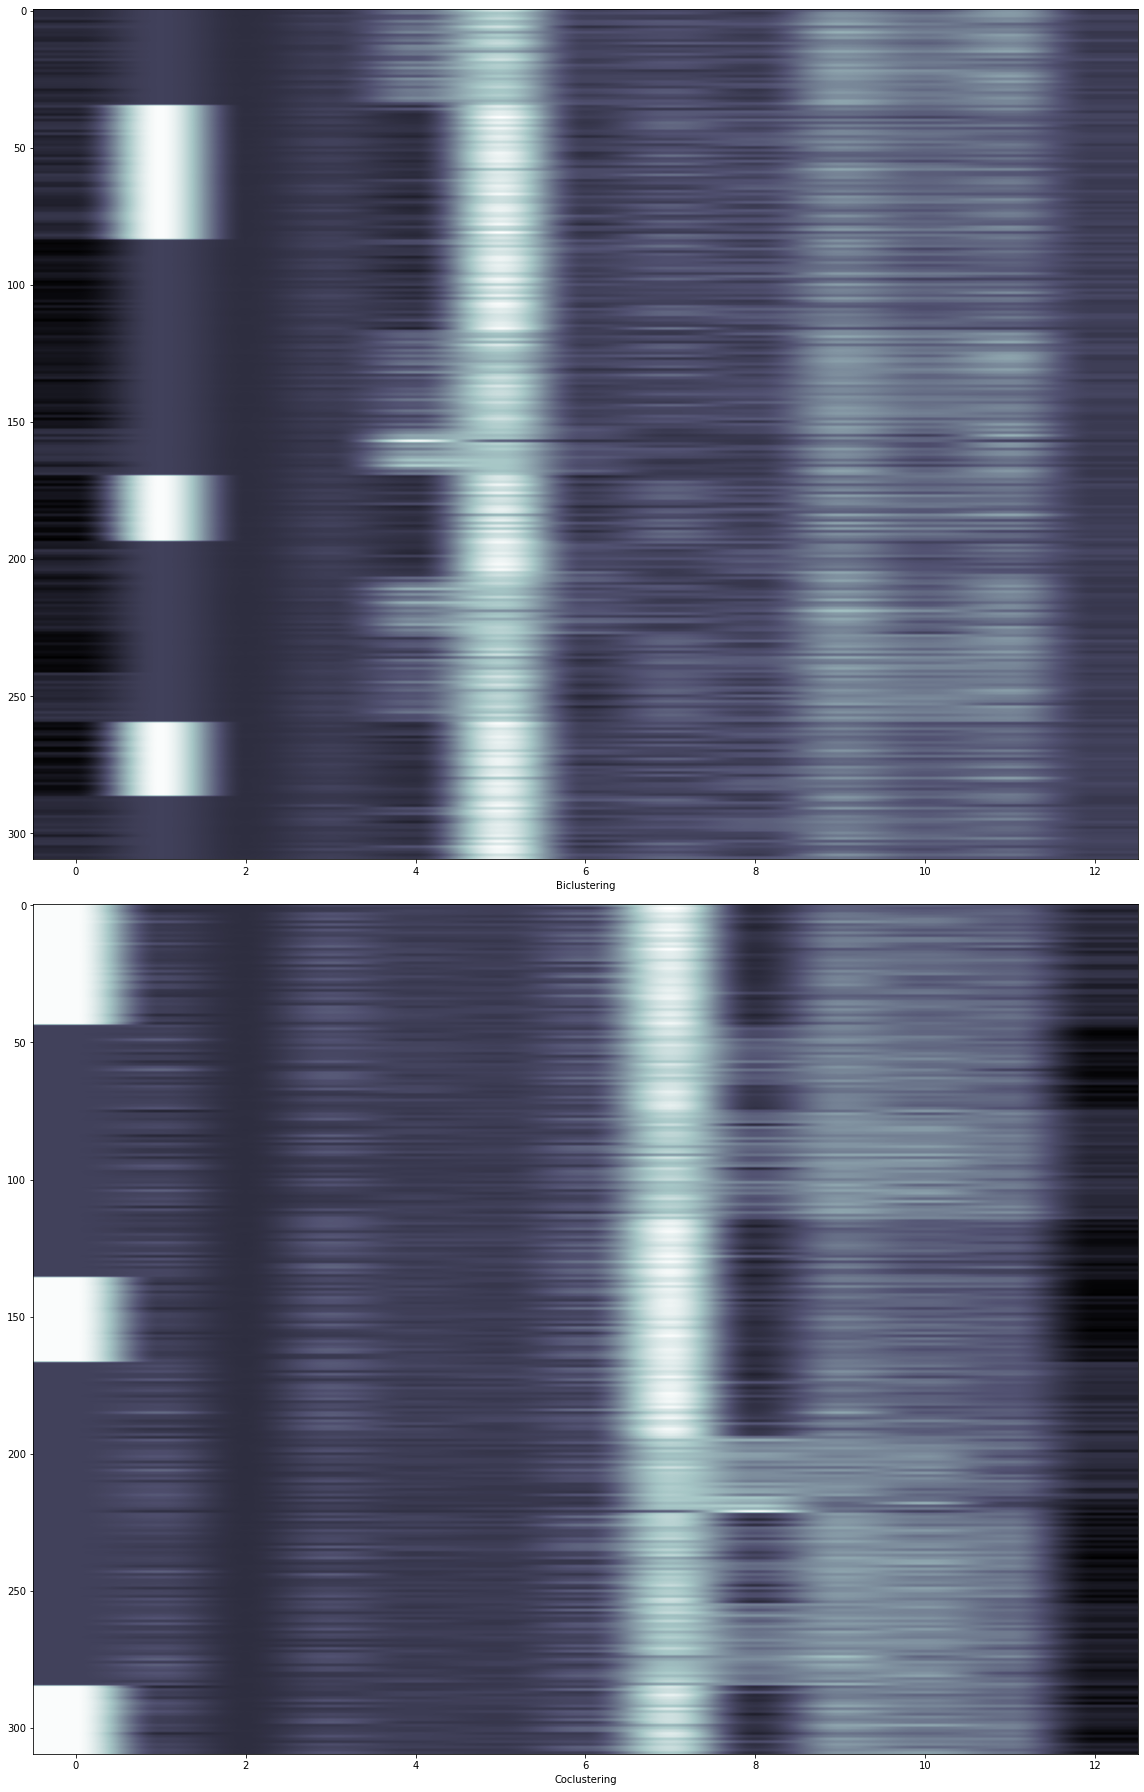

In [13]:
pipeline(12,transformed)